In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, binom, poisson, hypergeom, gamma, cauchy
import scipy.stats as stats


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Histogram -> p.d.f.

/tmp/ipykernel_202385/182887586.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='r')
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS', 'StayPuft'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS', 'StayPuft'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS', 'StayPuft'] not found. Falling back to DejaVu Sans.


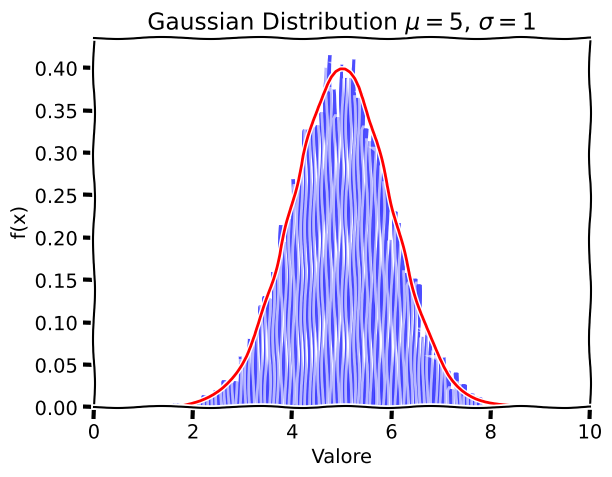

In [2]:
# Genera dati con distribuzione gaussiana
mu, sigma = 5, 1
N = 10000
bins = 100
dens = True
fit = True

data = np.random.normal(mu, sigma, N)

# Imposta lo stile "comic"
with plt.xkcd():

    # Crea l'istogramma
    count, b, ignored = plt.hist(data, bins=bins, density=dens, alpha=0.6, color='b')

    # if fit:
    # Sovrapponi la linea della distribuzione gaussiana
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)
    plt.plot(x, p, 'k', linewidth=2, color='r')

    bin_width = b[1] - b[0] 
    # Titoli e etichette
    title = f"Gaussian Distribution $\mu={mu}$, $\sigma={sigma}$"
    plt.title(title)
    plt.xlabel('Valore')

    if norm:
        plt.ylabel('f(x)')
    else:
        plt.ylabel('N(x)')

    plt.xlim(0, 10)

    # Mostra il grafico
    plt.show()

## Gaussian

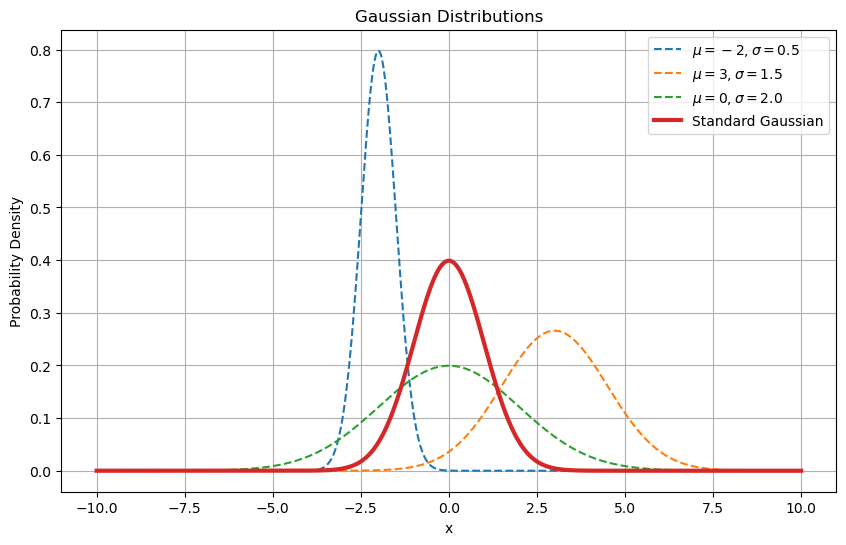

In [3]:
# Funzione per generare la distribuzione gaussiana
def gaussian(x, mu, sigma):
    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Intervallo di valori per x
x = np.linspace(-10, 10, 1000)

# Parametri per le gaussiane
params = [
    {'mu': -2, 'sigma': 0.5},
    {'mu': 3, 'sigma': 1.5},
    {'mu': 0, 'sigma': 2.0}
]

# Disegno delle gaussiane
plt.figure(figsize=(10, 6))

for param in params:
    y = gaussian(x, param['mu'], param['sigma'])
    plt.plot(x, y, label=f"$\mu={param['mu']}, \sigma={param['sigma']}$", linestyle='--')

# Aggiunta della gaussiana standard
standard_mu = 0
standard_sigma = 1
y_standard = gaussian(x, standard_mu, standard_sigma)
plt.plot(x, y_standard, label="Standard Gaussian", lw=3)

# Configurazione del grafico
plt.title("Gaussian Distributions")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.show()


### Gaussian and Central Limit Theorem

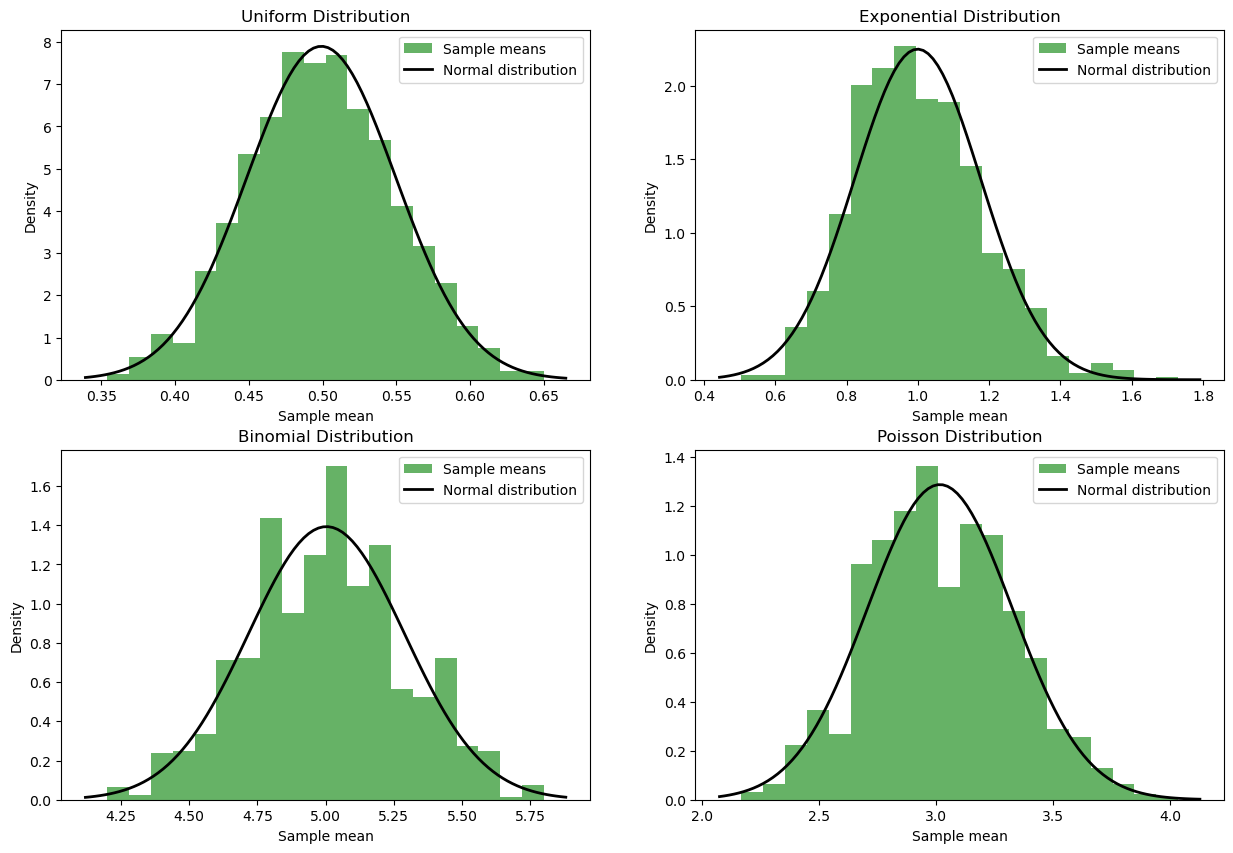

In [4]:

# Funzione per generare campioni e calcolare le medie campionarie
def generate_sample_means(distribution_func, sample_size, num_samples):
    samples = distribution_func(size=(num_samples, sample_size))
    sample_means = np.mean(samples, axis=1)
    return sample_means

# Parametri
num_samples = 1000  # Numero di campioni per ciascuna somma
sample_size = 30  # Numero di variabili casuali per ciascuna somma
num_bins = 20  # Numero di bin per l'istogramma

# Distribuzioni
distributions = {
    'Uniform': lambda size: np.random.uniform(low=0, high=1, size=size),
    'Exponential': lambda size: np.random.exponential(scale=1.0, size=size),
    'Binomial': lambda size: np.random.binomial(n=10, p=0.5, size=size),
    'Poisson': lambda size: np.random.poisson(lam=3.0, size=size)
}

# Plot delle distribuzioni
plt.figure(figsize=(15, 10))

all_sample_means = []

for i, (name, distribution_func) in enumerate(distributions.items(), 1):
    plt.subplot(2, 2, i)
    
    sample_means = generate_sample_means(distribution_func, sample_size, num_samples)
    all_sample_means.extend(sample_means)
    
    # Istogramma delle medie campionarie
    plt.hist(sample_means, bins=num_bins, density=True, alpha=0.6, color='g', label='Sample means')
    
    # Calcolo dei parametri della distribuzione normale
    mu = np.mean(sample_means)
    sigma = np.std(sample_means)
    
    # Disegna la distribuzione normale teorica
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, p, 'k', linewidth=2, label='Normal distribution')
    
    # Configurazione del grafico
    plt.title(f"{name} Distribution")
    plt.xlabel('Sample mean')
    plt.ylabel('Density')
    plt.legend()
    
plt.show()

## Binomial

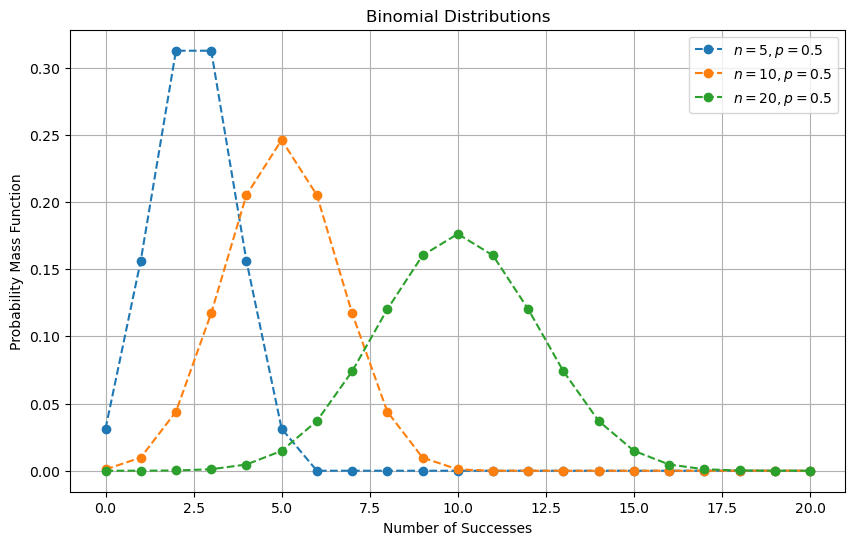

In [5]:
# Intervallo di valori per x (numero di successi)
x = np.arange(0, 21)

# Parametri per le distribuzioni binomiali
params = [
    {'n': 5, 'p': 0.5},
    {'n': 10, 'p': 0.5},
    {'n': 20, 'p': 0.5}
]

# Disegno delle distribuzioni binomiali
plt.figure(figsize=(10, 6))

for param in params:
    y = binom.pmf(x, param['n'], param['p'])
    plt.plot(x, y, label=f"$n={param['n']}, p={param['p']}$", linestyle='--', marker='o')


# Configurazione del grafico
plt.title("Binomial Distributions")
plt.xlabel("Number of Successes")
plt.ylabel("Probability Mass Function")
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.show()


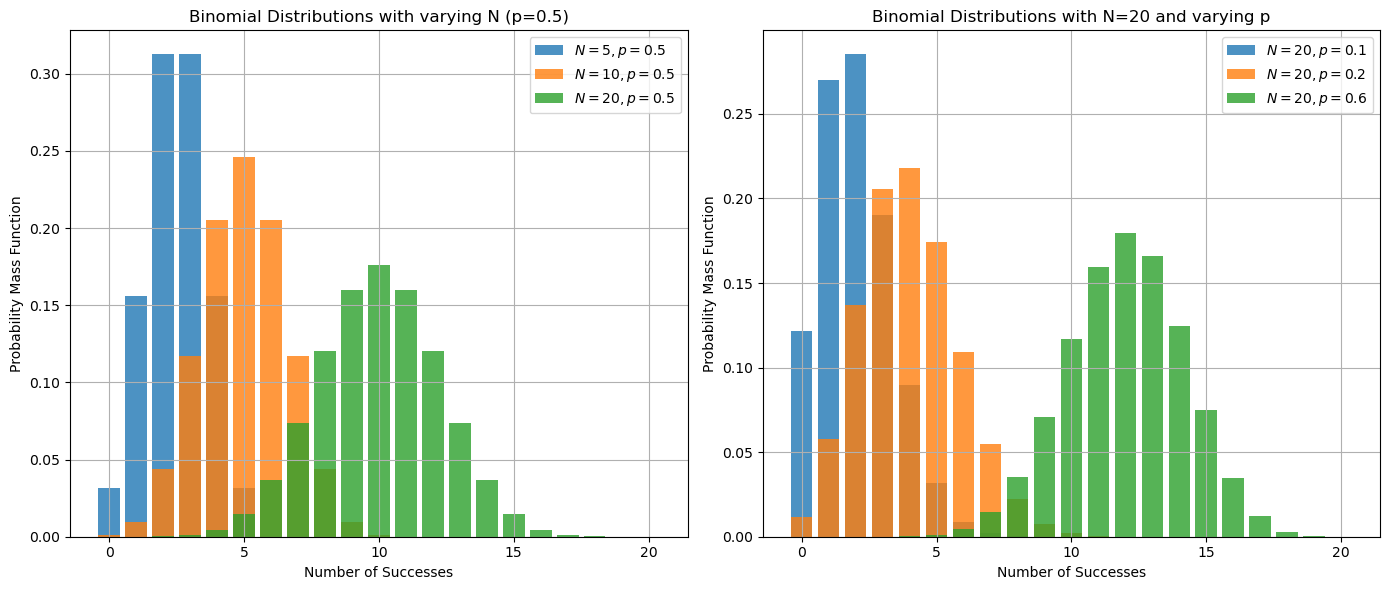

In [6]:
# Intervallo di valori per x (numero di successi)
x = np.arange(0, 21)

# Parametri per le distribuzioni binomiali
params_1 = [
    {'n': 5, 'p': 0.5},
    {'n': 10, 'p': 0.5},
    {'n': 20, 'p': 0.5}
]

params_2 = [
    {'n': 20, 'p': 0.1},
    {'n': 20, 'p': 0.2},
    {'n': 20, 'p': 0.6}
]

# Creazione della figura e dei subplot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Disegno delle distribuzioni binomiali come istogrammi per il primo set di parametri
for param in params_1:
    y = binom.pmf(x, param['n'], param['p'])
    axs[0].bar(x, y, alpha=0.8, label=f"$N={param['n']}, p={param['p']}$")

# Configurazione del primo grafico
axs[0].set_title("Binomial Distributions with varying N (p=0.5)")
axs[0].set_xlabel("Number of Successes")
axs[0].set_ylabel("Probability Mass Function")
axs[0].legend()
axs[0].grid(True)

# Disegno delle distribuzioni binomiali come istogrammi per il secondo set di parametri
for param in params_2:
    y = binom.pmf(x, param['n'], param['p'])
    axs[1].bar(x, y, alpha=0.8, label=f"$N={param['n']}, p={param['p']}$")

# Configurazione del secondo grafico
axs[1].set_title("Binomial Distributions with N=20 and varying p")
axs[1].set_xlabel("Number of Successes")
axs[1].set_ylabel("Probability Mass Function")
axs[1].legend()
axs[1].grid(True)

# Mostra il grafico
plt.tight_layout()
plt.show()


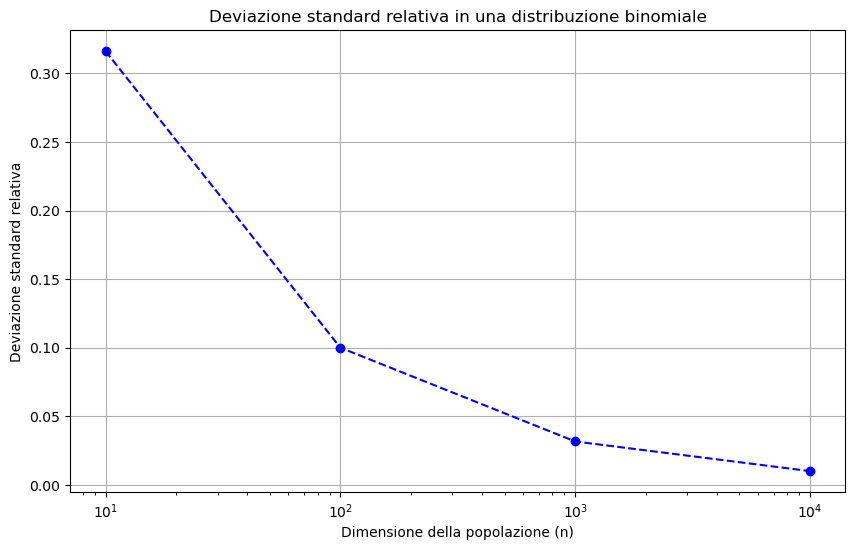

Frequenza di eventi estremi in una piccola popolazione: 0.0215
Frequenza di eventi estremi in una grande popolazione: 0.0215


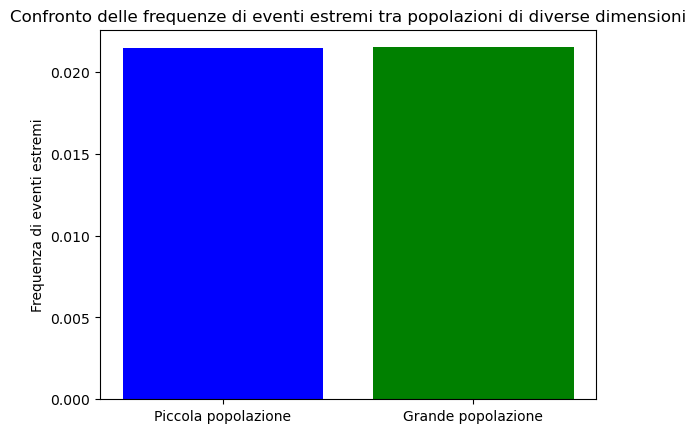

In [7]:
# Funzione per calcolare la deviazione standard relativa per una distribuzione binomiale
def relative_std_binomial(n, p):
    mean = n * p
    std_dev = np.sqrt(n * p * (1 - p))
    return std_dev / mean

# Parametri
p_success = 0.5

# Dimensioni delle popolazioni
population_sizes = [10, 100, 1000, 10000]
relative_stds = [relative_std_binomial(n, p_success) for n in population_sizes]

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
plt.plot(population_sizes, relative_stds, marker='o', linestyle='--', color='b')
plt.xscale('log')
plt.xlabel('Dimensione della popolazione (n)')
plt.ylabel('Deviazione standard relativa')
plt.title('Deviazione standard relativa in una distribuzione binomiale')
plt.grid(True)
plt.show()

# Funzione per simulare una distribuzione binomiale e calcolare la frequenza di eventi estremi
def simulate_binomial(n_trials, p_success, population_size, n_simulations):
    extremes = 0
    for _ in range(n_simulations):
        successes = np.random.binomial(n_trials, p_success, population_size)
        # Definiamo un evento estremo come avere più del 80% o meno del 20% di successi
        extreme_events = (successes > 0.8 * n_trials) | (successes < 0.2 * n_trials)
        extremes += np.sum(extreme_events)
    return extremes / (population_size * n_simulations)

# Parametri per la simulazione
n_trials = 10
n_simulations = 10000

# Popolazione piccola
small_population_size = 10
small_population_extremes = simulate_binomial(n_trials, p_success, small_population_size, n_simulations)

# Popolazione grande
large_population_size = 1000
large_population_extremes = simulate_binomial(n_trials, p_success, large_population_size, n_simulations)

print(f"Frequenza di eventi estremi in una piccola popolazione: {small_population_extremes:.4f}")
print(f"Frequenza di eventi estremi in una grande popolazione: {large_population_extremes:.4f}")

# Visualizzazione dei risultati
labels = ['Piccola popolazione', 'Grande popolazione']
frequencies = [small_population_extremes, large_population_extremes]

plt.bar(labels, frequencies, color=['blue', 'green'])
plt.ylabel('Frequenza di eventi estremi')
plt.title('Confronto delle frequenze di eventi estremi tra popolazioni di diverse dimensioni')
plt.show()


## Poisson

/tmp/ipykernel_202385/1158128239.py:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (lambda_**k * np.exp(-lambda_)) / np.math.factorial(k)


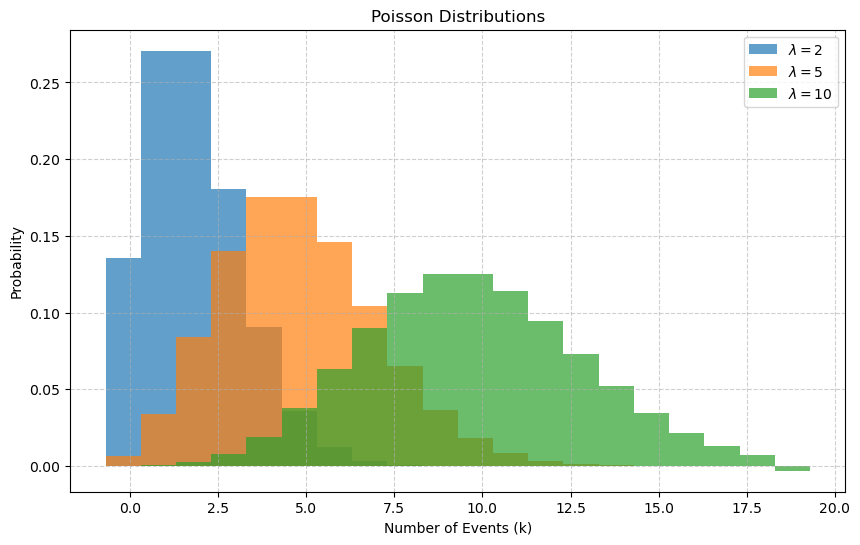

In [8]:
# Funzione per generare la distribuzione di Poisson
def poisson(k, lambda_):
    return (lambda_**k * np.exp(-lambda_)) / np.math.factorial(k)

# Intervallo di valori per k (numero di eventi)
k = np.arange(0, 20)

# Parametri per le distribuzioni di Poisson
params = [
    {'lambda_': 2},
    {'lambda_': 5},
    {'lambda_': 10}
]

# Disegno delle distribuzioni di Poisson
plt.figure(figsize=(10, 6))

for param in params:
    y = [poisson(x, param['lambda_']) for x in k]
    plt.bar(k - 0.2, y, width=1, label=f"$\lambda={param['lambda_']}$", alpha=0.7)

# Configurazione del grafico
plt.title("Poisson Distributions")
plt.xlabel("Number of Events (k)")
plt.ylabel("Probability")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostra il grafico
plt.show()


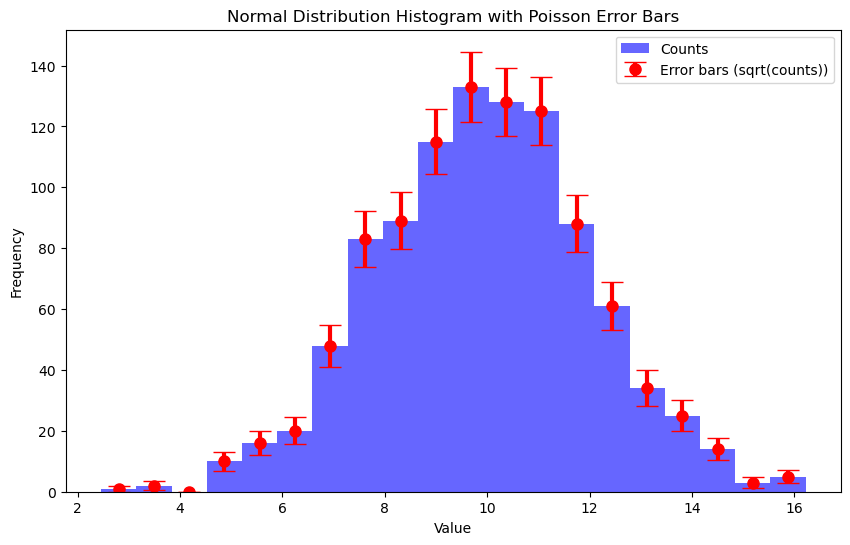

In [15]:
# Parametri della distribuzione normale
mean = 10
std_dev = 2

# Numero di campioni
n_samples = 1000

# Genera dati dalla distribuzione normale
data = np.random.normal(mean, std_dev, n_samples)

# Calcola l'istogramma
counts, bin_edges = np.histogram(data, bins=20)

# Calcola le barre d'errore come la radice quadrata del conteggio (poiché l'errore standard di una distribuzione di Poisson è sqrt(N))
errors = np.sqrt(counts)

# Centra i valori delle barre d'errore nei bin dell'istogramma
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Grafico dell'istogramma con barre d'errore
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=bin_edges[1] - bin_edges[0], color='blue', alpha=0.6, label='Counts')
plt.errorbar(bin_centers, counts, yerr=errors, fmt='o', color='red', label='Error bars (sqrt(counts))', lw=3, capsize=8, markersize=8)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution Histogram with Poisson Error Bars')
plt.legend()
plt.show()


## Uniform

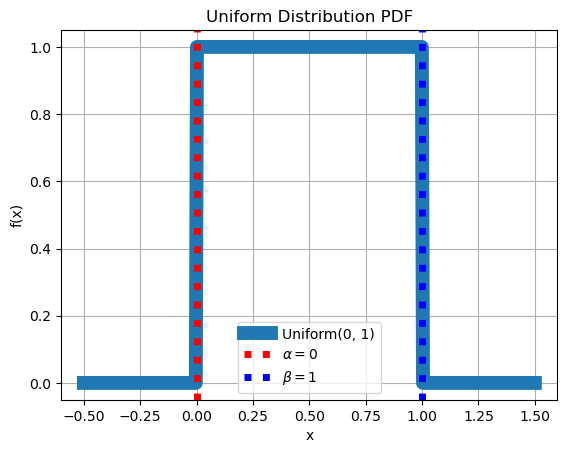

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the uniform distribution
alpha = 0
beta = 1

# Generate x values
x = np.linspace(-0.5, 1.5, 400)

# Calculate the uniform distribution PDF
def uniform_pdf(x, alpha, beta):
    return np.where((x >= alpha) & (x <= beta), 1 / (beta - alpha), 0)

# Calculate y values
y = uniform_pdf(x, alpha, beta)

# Plot the uniform distribution
plt.plot(x, y, label=f'Uniform({alpha}, {beta})', lw=10)
plt.axvline(x=alpha, color='r', linestyle='dotted', label=f'$\\alpha = {alpha}$', lw=5)
plt.axvline(x=beta, color='b', linestyle='dotted', label=f'$\\beta = {beta}$', lw=5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Uniform Distribution PDF')
plt.legend()
plt.grid(True)
plt.show()


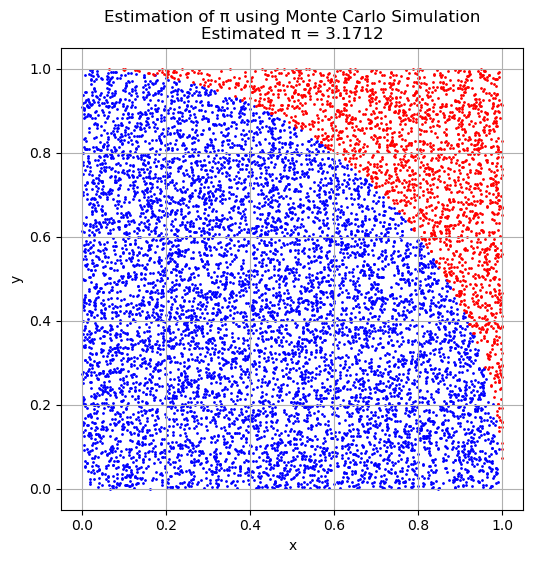

Estimated value of π: 3.1712


In [11]:
# Number of random points
num_points = 10000

# Generate random points in the unit square [0, 1] x [0, 1]
x = np.random.uniform(0, 1, num_points)
y = np.random.uniform(0, 1, num_points)

# Determine the points that are inside the unit circle
inside_circle = x**2 + y**2 <= 1

# Estimate the value of pi
pi_estimate = 4 * np.sum(inside_circle) / num_points

# Plot the points
plt.figure(figsize=(6, 6))
plt.scatter(x[inside_circle], y[inside_circle], color='blue', s=1)
plt.scatter(x[~inside_circle], y[~inside_circle], color='red', s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Estimation of π using Monte Carlo Simulation\nEstimated π = {pi_estimate}')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

print(f"Estimated value of π: {pi_estimate}")


## Exponential

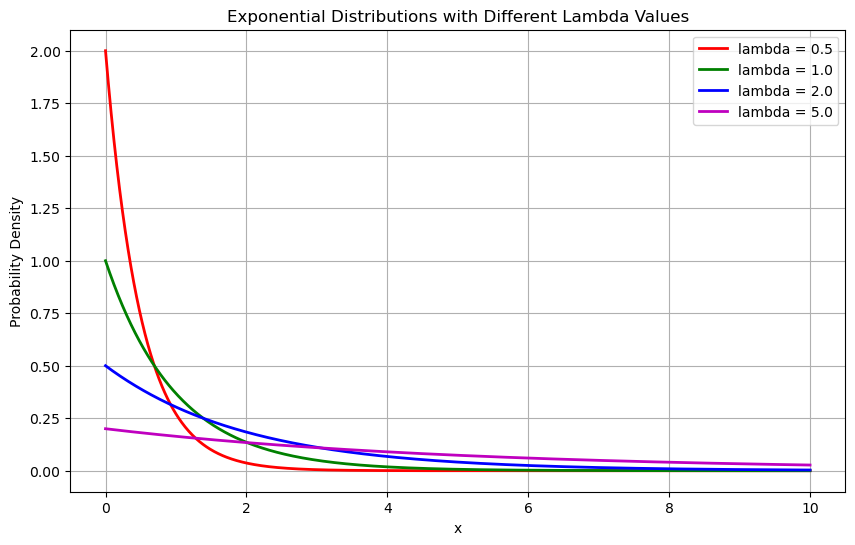

In [12]:
# Different lambda values
lambda_params = [0.5, 1.0, 2.0, 5.0]

# Colors for the different distributions
colors = ['r', 'g', 'b', 'm']

# Generate the x-axis values
x = np.linspace(0, 10, 1000)

plt.figure(figsize=(10, 6))

# Calculate and plot the PDF for each lambda
for lambda_param, color in zip(lambda_params, colors):
    pdf = (1 / lambda_param) * np.exp(-x / lambda_param)
    plt.plot(x, pdf, color=color, lw=2, label=f'lambda = {lambda_param}')

# Add labels and title
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Exponential Distributions with Different Lambda Values')
plt.legend()
plt.grid()

# Show the plot
plt.show()


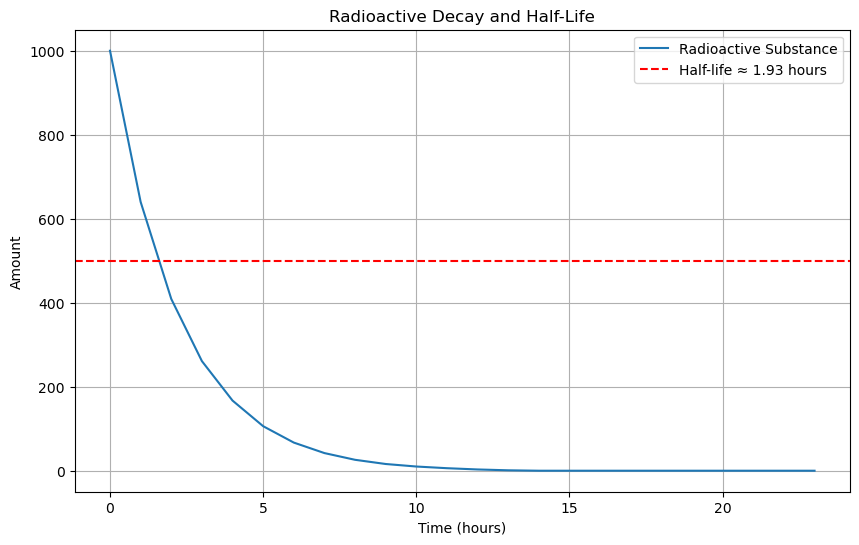

In [13]:
# Constants
initial_amount = 1000  # Initial amount of radioactive substance
decay_constant = 0.0001  # Decay constant (s^-1)

# Time parameters
t_max = 1 * 24 * 3600  # 10 days in seconds
dt = 3600  # Time step in seconds (1 hour)
time = np.arange(0, t_max, dt)

# Array to store the amount of substance at each time step
amount = np.zeros_like(time)
amount[0] = initial_amount

# Simulation loop
for t in range(1, len(time)):
    decay = decay_constant * amount[t-1] * dt
    amount[t] = amount[t-1] - decay

# Calculate half-life
half_life = np.log(2) / decay_constant

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(time / 3600, amount, label="Radioactive Substance")
plt.axhline(y=initial_amount / 2, color='r', linestyle='--', label=f'Half-life ≈ {half_life / 3600:.2f} hours')
plt.xlabel("Time (hours)")
plt.ylabel("Amount")
plt.title("Radioactive Decay and Half-Life")
plt.legend()
plt.grid(True)
plt.show()


## Other distributions

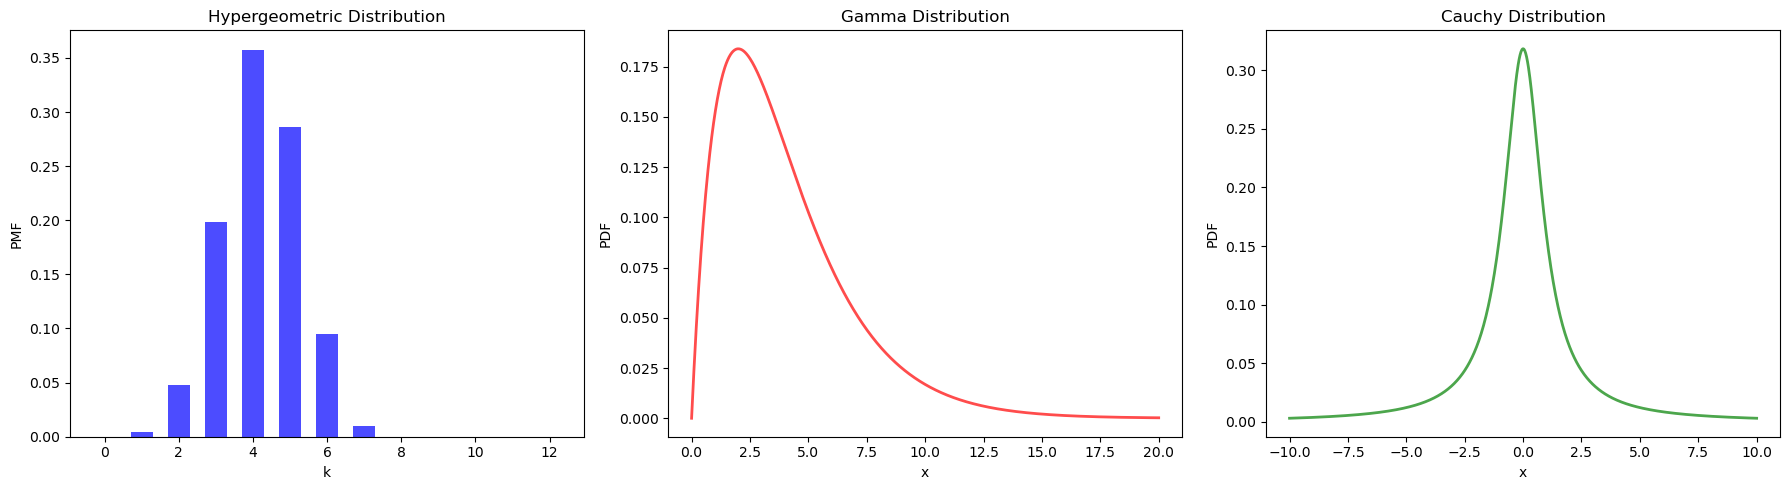

In [14]:
# Hypergeometric Distribution Parameters
M = 20  # Total number of objects
n = 7   # Number of success objects in the population
N = 12  # Number of objects drawn from the sample

# Create a hypergeometric distribution
rv_hypergeom = hypergeom(M, n, N)

# Generate hypergeometric data
x_hypergeom = np.arange(0, N+1)
pmf_hypergeom = rv_hypergeom.pmf(x_hypergeom)

# Gamma Distribution Parameters
shape = 2.0  # Shape parameter (k)
scale = 2.0  # Scale parameter (theta)

# Create a gamma distribution
rv_gamma = gamma(a=shape, scale=scale)

# Generate gamma data
x_gamma = np.linspace(0, 20, 1000)
pdf_gamma = rv_gamma.pdf(x_gamma)

# Cauchy Distribution Parameters
loc = 0.0   # Location parameter (median)
scale_cauchy = 1.0 # Scale parameter

# Create a Cauchy distribution
rv_cauchy = cauchy(loc, scale_cauchy)

# Generate Cauchy data
x_cauchy = np.linspace(-10, 10, 1000)
pdf_cauchy = rv_cauchy.pdf(x_cauchy)

# Plot all distributions side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Hypergeometric plot
axs[0].bar(x_hypergeom, pmf_hypergeom, width=0.6, color='blue', alpha=0.7)
axs[0].set_title('Hypergeometric Distribution')
axs[0].set_xlabel('k')
axs[0].set_ylabel('PMF')

# Gamma plot
axs[1].plot(x_gamma, pdf_gamma, 'r-', lw=2, alpha=0.7)
axs[1].set_title('Gamma Distribution')
axs[1].set_xlabel('x')
axs[1].set_ylabel('PDF')

# Cauchy plot
axs[2].plot(x_cauchy, pdf_cauchy, 'g-', lw=2, alpha=0.7)
axs[2].set_title('Cauchy Distribution')
axs[2].set_xlabel('x')
axs[2].set_ylabel('PDF')

plt.tight_layout()
plt.show()
